# Tutorial for the simulation

The functions relevants are packaged into Kagome.py
The simulation class can be initialised just from the lattice number of triangles in the two directions Nx and Ny
and specifying J for the hamiltonian , We also provide a name for the directory in which the files will be created for the results
- the next two argument enables you to control the seed for the generation of the initial configuration 
-the last two arguments enables you to provide a starting spin configuration to continue an old simulation

In [23]:
import SimulationKagome
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt
J=1
L=5
Nx=L
Ny=L
diretcory='tutorial'
A=SimulationKagome.Simulation(Nx,Ny, J,diretcory,seed_control=False,seed=1500,preload=False,oldconfig=None)


Then we can start the simulation by looping over the temperatures we first specify the number of hybrid monte carlo steps for decoherence time where we do not save the 
energy for heat capacity measurements after changing the temperature 

The monte carlo function is where we can run the simulation first argument is the number of MC steps  second is the temperature for the metropolis hastings acceptation rate then we specify if we want to record the energy every steps for the heat capacity measurement with the measure_capa boolean argument
Next if we want those steps to be hybrid with overrelaxation we specify overrelaxation=True and finally the overrelaxation_dose is the fraction of the lattice that will be 
rotated by an angle pi around the mean field
- we can then call the function saveconfig with the name of the file to be created with the informations

In [24]:
J=1
Ntemp=40
L=12
Nx=L
Ny=L

N=Nx*Ny*3
Temp=np.power(10*np.ones(Ntemp),np.linspace(-0.3,-3.8,Ntemp))
print(Temp)
#initialise simulation
A=SimulationKagome.Simulation(Nx,Ny, J,'ResultatsL'+str(L),seed_control=False,seed=1500)

print(A.total_energy())




for j,T in enumerate(Temp):
    

    decoherencetime=100000
    numberMC=500000
   
    A.Monte_Carlo(decoherencetime,T,measure_capa=False,overrelaxation=True,overrelaxation_dose=0.01)
    A.verify_norm()

    for q in range(1):
        A.Monte_Carlo(numberMC,T,measure_capa=True,overrelaxation=True,overrelaxation_dose=0.03)
        A.verify_norm()

    print(j,'temperature done')


    name=f'simulation{j}'
    
    A.saveconfig(name,T)

[5.01187234e-01 4.07620869e-01 3.31522356e-01 2.69630633e-01
 2.19293440e-01 1.78353670e-01 1.45056923e-01 1.17976327e-01
 9.59513925e-02 7.80382806e-02 6.34693576e-02 5.16202986e-02
 4.19833339e-02 3.41454887e-02 2.77708865e-02 2.25863552e-02
 1.83697212e-02 1.49402882e-02 1.21510941e-02 9.88261314e-03
 8.03763361e-03 6.53709228e-03 5.31668617e-03 4.32411700e-03
 3.51685001e-03 2.86029124e-03 2.32630507e-03 1.89200847e-03
 1.53879047e-03 1.25151453e-03 1.01786998e-03 8.27844405e-04
 6.73294595e-04 5.47597603e-04 4.45366912e-04 3.62221612e-04
 2.94598661e-04 2.39600202e-04 1.94869374e-04 1.58489319e-04]
-37.65228648498048


KeyboardInterrupt: 

# Then we can call the functions to display the heat capcity and the lattice

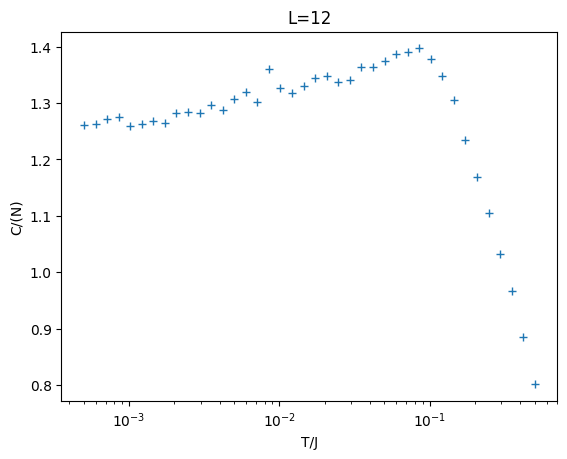

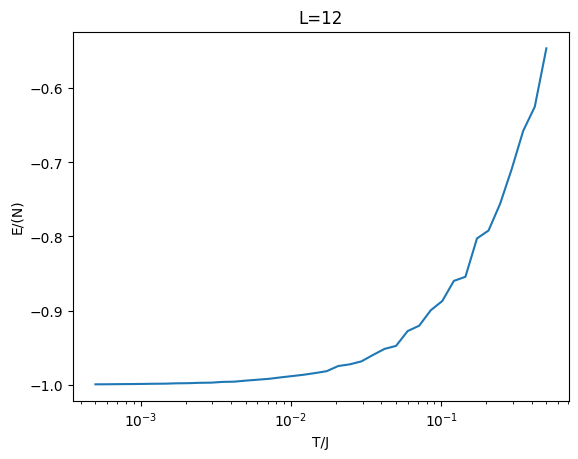

In [ ]:
cwd = Path.cwd()
parent = cwd.parent

directory='Previousresults'


relative_path = 'Results/'+str(directory)

full_path = os.path.join(parent, relative_path)

numberoffile=Ntemp-1
file =full_path+f'/simulation{numberoffile}.npy'
infos=np.load(file,allow_pickle=True).item()
Nx=infos['Nx']
Ny=infos['Ny']
A=SimulationKagome.Simulation(Nx,Ny, 1,directory,seed_control=False,seed=1500,preload=True,oldconfig=infos['configuration'])
A.spin_realign()


T=infos['Temperatures']

C=infos['Capacité']


x1=T
y1=np.array(C)/(4*N)

plt.semilogx(x1,y1,'+')
plt.xlabel('T/J')
plt.title(f'L={Nx}')
plt.ylabel('C/(N)')
plt.show()


x = T
y = np.array(infos['Energy'][1:])/(2*N)
plt.xlabel('T/J')
plt.title(f'L={Nx}')
plt.ylabel('E/(N)')
plt.semilogx(x,y)  # Log x-axis only
plt.show()


In [ ]:
    
    
    
J = 1
L = 12
Nx = L
Ny = L
theta = 2*np.pi/3

T_high = 1
T_low = 0.002
n_T = 20
Temp = np.linspace(T_high, T_low, n_T)



# Runs to get the mean values and standard deviations of the physical quantities
n_runs = 15  

E_mean_all = []
E_std_all = []
Capa_mean_all = []
Capa_std_all = []



for j, T in enumerate(Temp):
    decoherencetime = 50000
    numberMC = 100000

    Ener_runs = []
    Capa_runs = []

    for run in range(n_runs):
        A = Configuration(1, theta, Nx, Ny, J)

        A.Monte_Carlo(decoherencetime, T)
        A.verify_norm()

        Ener = A.measure_Capa(numberMC, T, Nx, Ny)
        A.verify_norm()

        Ener_runs.append(np.mean(Ener))
        Capa_runs.append(A.Capa[-1])

    E_mean_all.append(np.mean(Ener_runs))
    E_std_all.append(np.std(Ener_runs))
    
    Capa_mean = np.mean(Capa_runs)
    Capa_std = np.std(Capa_runs)
    
    # filtering because of a point of anomaly
    Capa_mean = min(Capa_mean, 2)
    Capa_std = min(Capa_std, 2 - Capa_mean)


    Capa_mean_all.append(Capa_mean)
    Capa_std_all.append(Capa_std)

    print(f"T step {j+1}/{n_T} done")
    
    
    
    
A.display_config()



triangle_sums = A.triangle_spins_sum()

for i in range(A.Nx):
    for j in range(A.Ny):
        print(f"Sum of spins in the triangle ({i},{j}) :", triangle_sums[i, j])   


# Plot Heat Capacity Vs T in browser with plotly

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=Temp,
    y=Capa_mean_all,
    error_y=dict(
        type='data',
        array=Capa_std_all,
        visible=True
    ),
    mode='markers+lines',
    name="Capacité thermique"
))

fig.update_layout(
    xaxis_type="log",
    xaxis_title="Température T",
    yaxis_title="Capacité thermique C(T)",
    title="Capacité thermique interactive",
    template="plotly_white"
)

fig.show(renderer="browser")




# Plot Energy Vs T in browser with plotly


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=Temp,
    y=E_mean_all,
    error_y=dict(
        type='data',
        array=E_std_all,
        visible=True
    ),
    mode='markers+lines',
    name="Heat Capacity"
))

fig.update_layout(
    xaxis_title="Temperature T",
    yaxis_title="Energy E",
    title="Interactive Energy",
    template="plotly_white"
)

fig.show(renderer="browser")
